# Dataset information

MAGIC Gamma Telescope Data Set (Target_variable: class: g,h # gamma (signal), hadron (background))

Link: https://archive.ics.uci.edu/ml/datasets/magic%2Bgamma%2Btelescope

Features to use -> {fLength, fWidth, fSize, fConc}


In [1]:
# imports
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

Step 1: load the dataset

In [2]:
# loads csv file into pandas dataframe
df = pd.read_csv('telescope.csv')
del df['Unnamed: 0']

In [3]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [4]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [5]:
#df_x = df.loc[:, df.columns != "class"]
df_x = df[["fLength", "fWidth", "fSize", "fConc"]]
#fLength, fWidth, fSize, fConc
df_y = df["class"]

In [6]:
df_y.unique()

array(['g', 'h'], dtype=object)

# Step 2 - 8: PCA implementation 



# Step 2: Normalize the feature columns


In [7]:
X_std = StandardScaler().fit_transform(df_x)

# Eigen decomposition : Compute the eigen values and eigen vectors

Step 3: 
Calculate the covariance between the feature columns. This should be a d x d matrix, where d is the number of features. 
$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

In matrix notation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector

In [8]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00005258  0.77055255  0.70249069 -0.63103226]
 [ 0.77055255  1.00005258  0.71755458 -0.60981073]
 [ 0.70249069  0.71755458  1.00005258 -0.85089453]
 [-0.63103226 -0.60981073 -0.85089453  1.00005258]]


# Step 4 : Finding the eigen values and eigen vectors that represent the feature space.

The eigenvectors (principal components) will be used to determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues will explain the variance of the data along the feature axes.




In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.49298934 -0.4817745  -0.7240244   0.02536769]
 [-0.49210111 -0.51124326  0.66733742 -0.2261141 ]
 [-0.52186876  0.3554157   0.14553036  0.76167814]
 [ 0.49239315 -0.61660631  0.09628267  0.6066921 ]]

Eigenvalues 
[3.14312868 0.49185862 0.23254418 0.13267883]


# Step 5 : Consider k=2, Find k axes in the old feature space that contribute most to the variance of the data.

where k is the number of principal components, i.e the number of axes in the new feature space.


In [10]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vecs))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs2 = [eig_pairs[0], eig_pairs[1]]


In [11]:
eig_pairs2

[(3.143128684822533,
  array([-0.49298934, -0.49210111, -0.52186876,  0.49239315])),
 (0.49185862205169245,
  array([-0.4817745 , -0.51124326,  0.3554157 , -0.61660631]))]

# Step 6: Compute the projection matrix

The projection matrix will be of dimension d x k. This matrix will be used in the next step to project the data points in the old feature space to the newly calculated feature space.

Note: The dimension of old feature space is d, whereas the new feature space is k.


In [12]:
matrix_w = np.hstack((eig_pairs2[0][1].reshape(4,1), 
                      eig_pairs2[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49298934 -0.4817745 ]
 [-0.49210111 -0.51124326]
 [-0.52186876  0.3554157 ]
 [ 0.49239315 -0.61660631]]


# Step 7: Project the data points onto the new feature space

The output of this step should be a matrix with dimension, no.of.samples x k

In [13]:
Y = X_std.dot(matrix_w)

# Step 8: Plot the new data points as a scatter plot

Visualize the new data points on a plot.

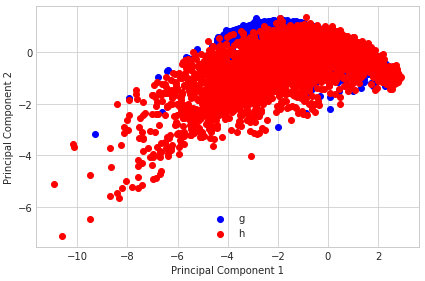

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('g', 'h'), 
                        ('blue', 'red')):
        plt.scatter(Y[df_y==lab, 0],
                    Y[df_y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()


# Step 9 - 14 Linear Discriminant Analysis

# Step 9 - Prepare the dataset

In [15]:
# Import the dataset again from step 1.
"""
Make sure that the data is normalized and all the null values are removed.
"""
# Insert code below this line

df2 = pd.read_csv('telescope.csv')
del df2['Unnamed: 0']

df2_x = df2[["fLength", "fWidth", "fSize", "fConc"]]
df2_y = df2["class"]

X2_std = StandardScaler().fit_transform(df2_x)

In [16]:
X = X2_std
df2_y_values = df2_y.values

In [17]:
y = []

for i in df2_y_values:
    y.append(1 if i == "g" else 2)
    
y = np.array(y)

label_dict = {1: 'g', 2: 'h'}

# Step 10 - Computing d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors $\pmb m_i$, $(i = 1,2,3,..)$ of the different classes:
    
$\pmb m_i = \begin{bmatrix} 
\mu_{\omega_i (\text{feature 1})}\\ 
\mu_{\omega_i (\text{feature 2})}\\ 
\mu_{\omega_i (\text{feature 3)}}\\
\mu_{\omega_i (\text{feature 4})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3,...$

In [18]:
classes = df2_y.unique()

In [19]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))

In [20]:
mean_vectors

[array([-0.2265, -0.1956, -0.0867,  0.0181]),
 array([ 0.4177,  0.3607,  0.16  , -0.0334])]

# Step 11 - Computing the Scatter Matrices

## 11.1 Within-class scatter matrix $S_W$

The **within-class scatter** matrix $S_W$ is computed by the following equation:  

$S_W = \sum\limits_{i=1}^{c}  S_i$

where  
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$  
(scatter matrix for every class) 

and $\pmb m_i$ is the mean vector    
$\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

In [21]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 17220.6949  13101.3934  12671.5693 -11857.607 ]
 [ 13101.3934  17678.3013  13052.1142 -11473.6465]
 [ 12671.5693  13052.1142  18756.0867 -16128.0155]
 [-11857.607  -11473.6465 -16128.0155  19008.4763]]


## 11.2 Between-class matrix $S_B$

The **between-class scatter** matrix $S_B$ is computed by the following equation:  

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$

where  
 $\pmb m$ is the overall mean, and $\pmb m_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

In [22]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[1799.3051 1553.7456  689.1012 -143.9955]
 [1553.7456 1341.6987  595.0564 -124.3437]
 [ 689.1012  595.0564  263.9133  -55.1477]
 [-143.9955 -124.3437  -55.1477   11.5237]]


# Step 12: Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$ to obtain the linear discriminants.

In [23]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[0.7247]
 [0.3167]
 [0.0102]
 [0.6119]]
Eigenvalue 1: 1.80e-01

Eigenvector 2: 
[[-0.3163]
 [ 0.2664]
 [ 0.3966]
 [ 0.8196]]
Eigenvalue 2: 1.56e-17

Eigenvector 3: 
[[-0.2682]
 [ 0.4265]
 [-0.4192]
 [-0.7553]]
Eigenvalue 3: -1.88e-17

Eigenvector 4: 
[[ 0.1121]
 [-0.0636]
 [ 0.0574]
 [ 0.99  ]]
Eigenvalue 4: -7.73e-18


In [24]:
eig_vals

array([ 1.8047e-01,  1.5575e-17, -1.8779e-17, -7.7268e-18])

In [25]:
eig_vecs

array([[ 0.7247, -0.3163, -0.2682,  0.1121],
       [ 0.3167,  0.2664,  0.4265, -0.0636],
       [ 0.0102,  0.3966, -0.4192,  0.0574],
       [ 0.6119,  0.8196, -0.7553,  0.99  ]])

### Checking the eigenvector-eigenvalue calculation

A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:

$\pmb A\pmb{v} =  \lambda\pmb{v}$  

<br>
where  
$\pmb A = S_{W}^{-1}S_B\\
\pmb{v} = \; \text{Eigenvector}\\
\lambda = \; \text{Eigenvalue}$

In [26]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1) 
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv), 
                                         eig_vals[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)

# This cell must run without errors

## Step 13: Selecting linear discriminants for the new feature subspace

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.  
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [27]:
# Eigenvalues in decreasing order:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.18046675374943777
1.8778952387898752e-17
1.5574691503932433e-17
7.726769904495566e-18


# 13.1. Choosing *k* eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\pmb W$ (here $4 \times 2$: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [28]:
# Tip: use np.hstack

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.7247 -0.2682]
 [ 0.3167  0.4265]
 [ 0.0102 -0.4192]
 [ 0.6119 -0.7553]]


# Step 14: Transforming the samples onto the new subspace

In the last step, we use the $4 \times 2$-dimensional matrix $\pmb W$ that we just computed to transform our samples onto the new subspace via the equation   

$\pmb Y = \pmb X \times \pmb W $.

(where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb Y$ are the transformed $n \times k$-dimensional samples in the new subspace).

In [29]:
X_lda = X.dot(W)


In [30]:
X_lda

array([[-0.4905,  0.1235],
       [-0.0555, -0.4538],
       [ 2.7056,  2.2784],
       ...,
       [ 0.032 ,  0.8818],
       [ 1.1635,  0.9908],
       [ 2.5211, -0.0892]])

# A comparison of PCA and LDA

In [31]:
# Sample code for the penguins and Iris dataset visualization.
# Do not change the code here.
# Code written in this cell is not graded but is used to grade the output of code from previous cells.

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)
    
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    plt.tight_layout
    plt.grid()
    
    plt.show()

In [32]:
def plot_step_lda():
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()

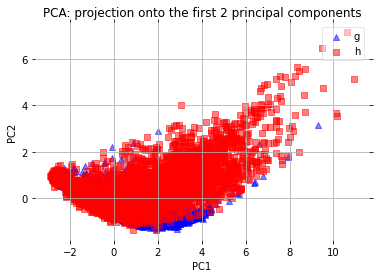

In [33]:
plot_pca()

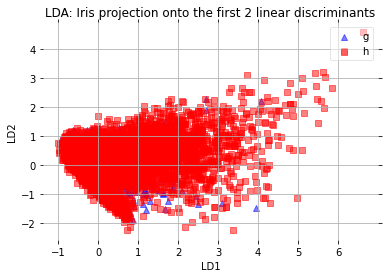

In [34]:
plot_step_lda()